### Sentiment Analysis of StackOverflow Comments

Team: HackyStacks

In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [93]:
#NLTK
#don't need these if we use Vader
import nltk
#nltk.download()
#from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import subjectivity
#from nltk.sentiment import SentimentAnalyzer
#from nltk.sentiment.util import *
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

### StackOverflow Comments Data

In [99]:
#replace with the most current comments file
df = pd.read_csv("sample_posts.csv", error_bad_lines=False)
df.head()

id  posttypeid  acceptedanswerid             creationdate  score  \
0   4           1               7.0  2008-07-31T21:42:52.667    604   
1   6           1              31.0  2008-07-31T22:08:08.620    273   
2   7           2               NaN  2008-07-31T22:17:57.883    418   
3   9           1            1404.0  2008-07-31T23:40:59.743   1743   
4  11           1            1248.0  2008-07-31T23:55:37.967   1409   

   viewcount                                               body  owneruserid  \
0    39047.0  <p>I want to use a track-bar to change a form'...          8.0   
1    17307.0  <p>I have an absolutely positioned <code>div</...          9.0   
2        NaN  <p>An explicit cast to double like this isn't ...          9.0   
3   519379.0  <p>Given a <code>DateTime</code> representing ...          1.0   
4   142726.0  <p>Given a specific <code>DateTime</code> valu...          1.0   

   lasteditoruserid lasteditordisplayname             lasteditdate  \
0         6786713.0                Rich B  2018-07-02T17:55:27.247   
1           63550.0                Rich B  2016-03-19T06:05:48.487   
2         4020527.0                   NaN  2017-12-16T05:06:57.613   
3         3956566.0                Rich B  2018-04-21T17:48:14.477   
4         6479704.0           user2370523  2017-06-04T15:51:19.780   

          lastactivitydate                                              title  \
0  2019-01-17T13:39:48.937                         Convert Decimal to Double?   
1  2018-12-15T03:57:18.220  Percentage width child element in absolutely p...   
2  2017-12-16T05:06:57.613                                                NaN   
3  2018-07-25T11:57:14.110            How do I calculate someone's age in C#?   
4  2019-01-03T08:03:07.237                      Calculate relative time in C#   

                                                tags  answercount  \
0  <c#><floating-point><type-conversion><double><...         13.0   
1             <html><css><css3><internet-explorer-7>          6.0   
2                                                NaN          NaN   
3                               <c#><.net><datetime>         63.0   
4  <c#><datetime><time><datediff><relative-time-s...         36.0   

   commentcount  favoritecount       communityowneddate  
0             2           46.0  2012-10-31T16:42:47.213  
1             0           11.0                      NaN  
2             0            NaN                      NaN  
3             7          417.0  2011-08-16T19:40:43.080  
4             3          536.0  2009-09-04T13:15:59.820

In [100]:
cm = df["body"]
cm.head()

0    <p>I want to use a track-bar to change a form'...
1    <p>I have an absolutely positioned <code>div</...
2    <p>An explicit cast to double like this isn't ...
3    <p>Given a <code>DateTime</code> representing ...
4    <p>Given a specific <code>DateTime</code> valu...
Name: body, dtype: object

### VADER Sentiment Analysis

* Valence Aware Dictionary and sEntiment Reasoner 
* a lexicon and rule-based sentiment analysis tool
* for sentiments expressed in social media

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#### Positive, Negative and Neutral scores: proportion of text that falls in these categories
#### Compound score: metric for magnitude of the sentiment intensity
(influenced by punctuation, capitalization, degree modifiers, conjunctions, emojis, slangs and acronyms)
* positive sentiment: compound score >= 0.05

* neutral sentiment: (compound score > -0.05 & < 0.05)

* negative sentiment: compound score <= -0.05

In [94]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]

In [95]:
#Negative
sentiment_analyzer_scores("this question is stupid!")

-0.5707

In [96]:
#Neutral
sentiment_analyzer_scores("you need a closing bracket")

0.0

In [97]:
#Positive
sentiment_analyzer_scores("great! 😄 nice question!")

0.9183

In [104]:
#append the sentiment score as new column
df["sentiment"]=df["body"].apply(sentiment_analyzer_scores)

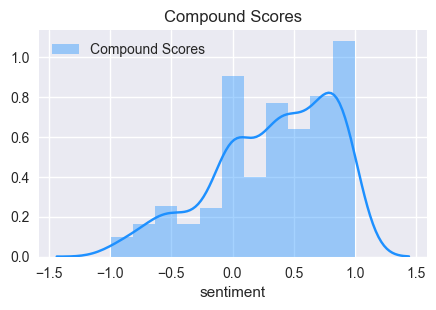

In [106]:
#histogram of the scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(5,3), dpi=100)
sns.distplot(df["sentiment"] ,color="dodgerblue", label="Compound Scores")
plt.title('Compound Scores')
plt.legend()
plt.show()

#### Reference
Introduction to Vader:

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

Origin paper to Vader:

http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

Github project of Vader:

https://github.com/cjhutto/vaderSentiment
